In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
def normalize_col(df_col):
    return (df_col-df_col.min())/(df_col.max()-df_col.min())

In [3]:
df = pd.read_csv('data/estaticos_market.csv', index_col='id')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df[df.drop(columns=['dt_situacao']).duplicated()]

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
e8d29c3a11f725

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Columns: 180 entries, fl_matriz to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(26)
memory usage: 610.6+ MB


In [7]:
df.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae39509

In [8]:
df.shape

(462298, 180)

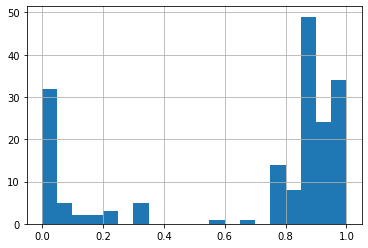

In [9]:
df.isna().mean().hist(bins=20)

181 colunas é uma grande quantidade. Acredito já haver features suficientes com menos de 20% de dados faltantes.

Por hora, manteremos apenas as features com menos de 20% de dados faltantes e analisaremos o significado das features para vermos se vale a pena imputar valores ou simplesmente eliminar da análise.

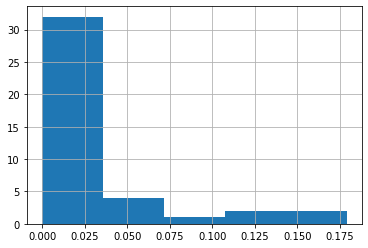

In [10]:
features = df.loc[:, df.isna().mean() < 0.2].columns.to_list()
df[features].isna().mean().hist(bins=5)

In [11]:
df[features].isna().mean().sort_values(ascending=False)

fl_optante_simples                     0.178917
fl_optante_simei                       0.178917
nm_micro_regiao                        0.126970
nm_meso_regiao                         0.126970
nu_meses_rescencia                     0.097937
vl_faturamento_estimado_aux            0.059514
de_faixa_faturamento_estimado_grupo    0.059514
de_faixa_faturamento_estimado          0.059514
vl_faturamento_estimado_grupo_aux      0.059514
de_saude_rescencia                     0.032124
de_saude_tributaria                    0.032124
de_nivel_atividade                     0.024158
sg_uf_matriz                           0.004194
fl_antt                                0.004168
nm_divisao                             0.004168
nm_segmento                            0.004168
setor                                  0.004168
fl_spa                                 0.004168
vl_total_veiculos_leves_grupo          0.004168
fl_veiculo                             0.004168
vl_total_veiculos_pesados_grupo        0

In [12]:
df[features].select_dtypes(exclude=['float64']).nunique()

fl_matriz                                 2
de_natureza_juridica                     67
sg_uf                                     6
natureza_juridica_macro                   7
de_ramo                                  33
setor                                     5
idade_emp_cat                             6
fl_me                                     2
fl_sa                                     2
fl_epp                                    1
fl_mei                                    2
fl_ltda                                   2
dt_situacao                            7334
fl_st_especial                            2
fl_email                                  2
fl_telefone                               2
fl_rm                                     2
nm_divisao                               87
nm_segmento                              21
fl_spa                                    2
fl_antt                                   2
fl_veiculo                                2
fl_optante_simples              

- `fl_optante_simples` e `fl_optante_simei`: Podem ser inferidas da natureza jurídica. Eliminadas.
- `nm_micro_regiao`, `nm_meso_regiao` e `sg_uf`: Podem ser úteis para clientes que buscam empresas locais.
- `nu_meses_rescencia`: Pela descrição, deve ser uma variável atualizada todo mês. São grandes as chances desse dado estar sempre desatualizado. Eliminada.
- `vl_faturamento_estimado_aux`, `de_faixa_faturamento_estimado_grupo`, `de_faixa_faturamento_estimado` e `vl_faturamento_estimado_grupo_aux`: Os valores numéricos são bastante importantes para determinar o tamanho da empresa. As faixas de faturamento são um resumo dos valores, então mantemos apenas os valores numéricos.
- `de_saude_rescencia` e `de_saude_tributaria`: O mais relevante é se a situação está OK ou não. Mantemos apenas `de_saude_tributaria` e transformamos apropriadamente.
- `de_nivel_atividade`: A probabilidade de estar operando é importante para determinar se o lead é recomendado ou não. Mantemos.
- `sg_uf_matriz`: Não enxergo muita relação do estado da matriz. Se for depender da localização, seria da localização da filial. Eliminada.
- `fl_antt`: A certificação pode ser importante. Mantemos.
- `nm_divisao` e `nm_segmento`: Acredito que podemos ter uma boa ideia da área de atuação da empresa pelo seu setor e ramo. Como são features categóricas de alta cardinalidade, eliminamos.
- `fl_spa`: Talvez seja um indicador relevante para algum cliente. Como é um booleano não custa muito manter.
- `vl_total_veiculos_pesados_grupo`, `vl_total_veiculos_leves_grupo` e `fl_veiculo`: A flag deve ser False se qualquer um dos outros valores não é nulo. Os valores fornecem mais informações, portanto, mantemos os valores e eliminamos o booleano.
- `fl_simples_irregular` e `fl_passivel_iss`: Estão relacionadas à situação legal. Parece redundante com `de_saude_tributaria`. Eliminamos.
- `dt_situacao`: É a data relacionada a uma feature `de_situacao`, que não se encontra na base. Eliminada.
- `fl_me`, `fl_sa`, `fl_epp`, `fl_mei` e `fl_ltda`: Podem apontar algo mais explicitamente. Mantemos.
- `fl_matriz`: Importante.
- `de_natureza_juridica` e `natureza_juridica_macro`: A feature `de_natureza_juridica` é de alta cardinalidade. Provavelmente a `natureza_juridica_macro` já discrimina as empresas suficientemente.
- `de_ramo` e `setor`: São muito importantes para descrever a empresa.
- `idade_empresa_anos` e `idade_emp_cat`: Eliminamos a categórica, mantendo somente o valor numérico.
- `qt_filiais`: Pode ser relevante para determinar o tamanho da empresa, ou ainda para clientes com soluções para gerenciamento de filiais.
- `fl_st_especial`: Para clientes que procuram empresas com problemas judiciais, pode ser relevante.
- `fl_email` e `fl_telefone`: Não parecem relevantes. Eliminadas.
- `fl_rm`: Pode ser relevante. Mantemos.

In [13]:
cols_to_remove = [
    'fl_optante_simples',
    'fl_optante_simei',
    'nu_meses_rescencia',
    'de_faixa_faturamento_estimado_grupo',
    'de_faixa_faturamento_estimado',
    'de_saude_rescencia',
    'sg_uf_matriz',
    'nm_divisao',
    'nm_segmento',
    'fl_veiculo',
    'fl_simples_irregular',
    'fl_passivel_iss',
    'dt_situacao',
    'de_natureza_juridica',
    'idade_emp_cat',
    'fl_email',
    'fl_telefone',
    'Unnamed: 0',
]

for col in cols_to_remove:
    try:
        features.remove(col)
    except ValueError:
        pass

In [14]:
df['de_saude_tributaria'].unique()

array(['VERDE', 'CINZA', 'AMARELO', 'LARANJA', nan, 'AZUL', 'VERMELHO'],
      dtype=object)

Há um código de cores não explicado no dicionário de dados. Vou assumir uma ordem "intuitiva" e imputar 'CINZA' nos valores nulos.

In [15]:
saude_dict = {
    'VERMELHO': 0,
    'LARANJA': 1,
    'AMARELO': 2,
    'CINZA': 3,
    'AZUL': 4,
    'VERDE': 5,
}

df['de_saude_tributaria'] = df['de_saude_tributaria'].map(saude_dict).fillna(3).astype('int8')

In [16]:
df['de_nivel_atividade'].unique()

array(['ALTA', 'BAIXA', 'MEDIA', nan, 'MUITO BAIXA'], dtype=object)

Imputamos os nulos com 'MEDIA'.

In [17]:
atividade_dict = {
    'MUITO BAIXA': 0,
    'BAIXA': 1,
    'MEDIA': 2,
    'ALTA': 3
}

df['de_nivel_atividade'] = df['de_nivel_atividade'].map(atividade_dict).fillna(2).astype('int8')

Como não sabemos quão mais relevantes as features numéricas são em relação às features booleanas, é mais apropriado que seus valores sejam normalizados.

Dentre as variáveis numéricas com grande range, por exemplo, os valores de faturamento, uma análise na escala 
logarítmica faz mais sentido. Então nestas features serão aplicadas uma transformação logarítimica seguida da normalização.

In [18]:
df[features].dtypes

fl_matriz                               bool
sg_uf                                 object
natureza_juridica_macro               object
de_ramo                               object
setor                                 object
idade_empresa_anos                   float64
fl_me                                   bool
fl_sa                                   bool
fl_epp                                  bool
fl_mei                                  bool
fl_ltda                                 bool
fl_st_especial                          bool
fl_rm                                 object
fl_spa                                object
fl_antt                               object
vl_total_veiculos_pesados_grupo      float64
vl_total_veiculos_leves_grupo        float64
de_saude_tributaria                     int8
de_nivel_atividade                      int8
nm_meso_regiao                        object
nm_micro_regiao                       object
vl_faturamento_estimado_aux          float64
vl_faturam

Para cada feature `float64`, os valores a serem imputados são diferentes. Os valores dos veículos serão imputados 0, e os valores de faturamento podem ser imputados a mediana.
A feature `qt_filiais`, apesar de ser `int`, pode ser processado assim como os floats.

In [19]:
df['vl_total_veiculos_pesados_grupo'].fillna(0, inplace=True)
df['vl_total_veiculos_leves_grupo'].fillna(0, inplace=True)
df['vl_faturamento_estimado_aux'].fillna(df['vl_faturamento_estimado_aux'].median(), inplace=True)
df['vl_faturamento_estimado_grupo_aux'].fillna(df['vl_faturamento_estimado_grupo_aux'].median(), inplace=True)

In [20]:
float_features = [
    'idade_empresa_anos',
    'vl_total_veiculos_pesados_grupo',
    'vl_total_veiculos_leves_grupo',
    'vl_faturamento_estimado_aux',
    'vl_faturamento_estimado_grupo_aux',
    'qt_filiais'
]

for col in float_features:
    df[col] = normalize_col(np.log(1 + df[col])).astype('float32')
    
df[float_features].head(10)

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0.584005,0.0,0.0,0.639181,0.279537,0.000000
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0.189909,0.0,0.0,0.523698,0.105267,0.000000
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,0.445164,0.0,0.0,0.462372,0.012723,0.000000
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,0.429184,0.0,0.0,0.523698,0.105267,0.000000
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,0.304422,0.0,0.0,0.523698,0.105267,0.000000
529a1f5fc6f88071db7d38492a0ce7c985c77e9b1c3bb62f5bd2ebec4860a392,0.783016,0.0,0.0,0.523698,0.105267,0.000000
8bf37c178778e537b108e58bf20552abe10c3a7fae129b04b52506188e7176da,0.449976,0.0,0.0,0.462372,0.012723,0.000000
0114fd3fbdc347c561843cde6aece12e8e53cb5d32c77dd2d5cb382605b7be79,0.007390,0.0,0.0,0.523698,0.105267,0.000000
6c45aabb849a760a3a7107c7a61262642f683feb8912a41a859f69fe4ce02b1c,0.551151,0.0,0.0,0.523698,0.105267,0.000000


In [21]:
ordinal_features = [
    'de_saude_tributaria',
    'de_nivel_atividade',
]

for col in ordinal_features:
    df[col] = normalize_col(df[col]).astype('float32')

cols_location = [
    'sg_uf',
    'nm_meso_regiao',
    'nm_micro_regiao',
]

df[cols_location].fillna('NAO INFORMADO', inplace=True)

Dentre os portfólios fornecidos, as regiões não tiveram muito impacto nas decisões.

In [22]:
cols_location = [
    'sg_uf',
    'nm_meso_regiao',
    'nm_micro_regiao',
]

for col in cols_location:
    try:
        features.remove(col)
    except ValueError:
        pass

A grande maioria das features booleanas estão como `object`.

In [23]:
boolean_features = [feature for feature in features if 'fl_' in feature]
boolean_features

['fl_matriz',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'fl_st_especial',
 'fl_rm',
 'fl_spa',
 'fl_antt']

In [24]:
df[boolean_features].head(10)

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_rm,fl_spa,fl_antt
id,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,False,False,False,False,False,False,SIM,False,False
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,False,False,False,True,False,False,SIM,False,False
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,False,False,False,True,False,False,SIM,False,False
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,False,False,False,False,False,False,SIM,False,False
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,True,False,False,False,False,False,False,SIM,False,False
529a1f5fc6f88071db7d38492a0ce7c985c77e9b1c3bb62f5bd2ebec4860a392,True,False,False,False,False,False,False,NAO,False,False
8bf37c178778e537b108e58bf20552abe10c3a7fae129b04b52506188e7176da,True,False,False,False,True,False,False,SIM,False,False
0114fd3fbdc347c561843cde6aece12e8e53cb5d32c77dd2d5cb382605b7be79,True,False,False,False,True,False,False,SIM,False,False
6c45aabb849a760a3a7107c7a61262642f683feb8912a41a859f69fe4ce02b1c,True,False,False,False,False,False,False,NAO,False,False


In [25]:
boolean_dict = {
    'True': 1,
    'False': 0,
    'SIM': 1,
    'NAO': 0
}

for col in boolean_features:
    mode = df[col].mode().values[0]
    df[col] = df[col].map(boolean_dict).fillna(value=mode).astype('int8')
    
df[boolean_features].head(10)

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_rm,fl_spa,fl_antt
id,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,0,0,0,0,0,0,1,0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,0,0,0,0,0,0,1,0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,0,0,0,0,0,0,1,0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,0,0,0,0,0,0,1,0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,0,0,0,0,0,0,1,0,0
529a1f5fc6f88071db7d38492a0ce7c985c77e9b1c3bb62f5bd2ebec4860a392,1,0,0,0,0,0,0,0,0,0
8bf37c178778e537b108e58bf20552abe10c3a7fae129b04b52506188e7176da,1,0,0,0,0,0,0,1,0,0
0114fd3fbdc347c561843cde6aece12e8e53cb5d32c77dd2d5cb382605b7be79,1,0,0,0,0,0,0,1,0,0
6c45aabb849a760a3a7107c7a61262642f683feb8912a41a859f69fe4ce02b1c,1,0,0,0,0,0,0,0,0,0


In [26]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   fl_matriz                          462298 non-null  int8   
 1   natureza_juridica_macro            462298 non-null  object 
 2   de_ramo                            462298 non-null  object 
 3   setor                              460371 non-null  object 
 4   idade_empresa_anos                 462298 non-null  float32
 5   fl_me                              462298 non-null  int8   
 6   fl_sa                              462298 non-null  int8   
 7   fl_epp                             462298 non-null  int8   
 8   fl_mei                             462298 non-null  int8   
 9   fl_ltda                            462298 non-null  i

Por fim, fazemos um tratamento das features categóricas.

In [27]:
df['setor'].unique()

array(['CONSTRUÇÃO CIVIL', 'SERVIÇO', 'INDUSTRIA', 'COMERCIO',
       'AGROPECUARIA', nan], dtype=object)

Como não há uma categoria que englobe os faltantes, vamos dar uma olhada no ramo das empresas que não registraram seu setor.

In [28]:
df.loc[df['setor'].isna(), 'de_ramo'].unique()

array(['OUTROS'], dtype=object)

Aparentemente, faz sentido criarmos uma nova categoria 'OUTROS' no setor.

In [29]:
df['setor'].fillna('OUTROS', inplace=True)

In [30]:
df[features].head()

,fl_matriz,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_rm,fl_spa,fl_antt,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,de_saude_tributaria,de_nivel_atividade,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,0.584005,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,1.000000,0.639181,0.279537,0.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,0.189909,0,0,0,0,0,0,1,0,0,0.0,0.0,0.6,0.333333,0.523698,0.105267,0.0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,0.445164,0,0,0,0,0,0,1,0,0,0.0,0.0,0.4,0.666667,0.462372,0.012723,0.0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,OUTROS,SERVICOS DIVERSOS,SERVIÇO,0.429184,0,0,0,0,0,0,1,0,0,0.0,0.0,0.4,0.666667,0.523698,0.105267,0.0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,0.304422,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,1.000000,0.523698,0.105267,0.0


In [31]:
df = pd.get_dummies(df[features], prefix_sep='-')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 64 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   fl_matriz                                                  462298 non-null  int8   
 1   idade_empresa_anos                                         462298 non-null  float32
 2   fl_me                                                      462298 non-null  int8   
 3   fl_sa                                                      462298 non-null  int8   
 4   fl_epp                                                     462298 non-null  int8   
 5   fl_mei                                                     462298 non-null  int8   
 6   fl_ltda                                                 

Salvando a nova base de referência tratada. Note a redução do consumo de memória de 600 MB para 60 MB.

In [32]:
df.to_csv('data/estaticos_market_clean.csv')

## Gerando as previsões

Como o preprocessamento precisa ser feito uma única vez para gerar a base limpa, prosseguimos com a modelagem em um [outro notebook](model.ipynb)